<a href="https://colab.research.google.com/github/jazu1412/PYCARET_LOWCODE_ML/blob/main/TimeSeriesForecast_WithoutExogenous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#POPULATION TIME SERIES FORECAST WITHOUT EXOGENOUS VARIABLE

https://www.kaggle.com/datasets/census/population-time-series-data/data

In [3]:
!pip install pycaret
!pip install pycaret[mlops]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [12]:
import pandas as pd
### load sample dataset from pycaret dataset module
from pycaret.datasets import get_data
from google.colab import files
uploaded_files = files.upload()
data = pd.read_csv('POPH.csv')
print(f"Successfully loaded {len(data)} rows.")

Saving POPH.csv to POPH (1).csv
Successfully loaded 100 rows.


In [21]:
from pycaret.time_series import TSForecastingExperiment
exp = TSForecastingExperiment()
# The 'date' column is likely the index, reset it
data = data.reset_index()
data['date'] = pd.to_datetime(data['date']) #The POPH dataset has a Date column that needs to be converted to datetime
data.set_index('date', inplace=True) #set the Date column as the index
s = exp.setup(data, fh = 3, session_id = 123,use_gpu=True,target='value', ignore_features=['realtime_start', 'realtime_end']) # Ignore the realtime_start and realtime_end columns as they are not exogenous variables.

,Description,Value
0,session_id,123
1,Target,value
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(100, 1)"
5,Transformed data shape,"(100, 1)"
6,Transformed train set shape,"(97, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Th

In [22]:
data.head()

,realtime_start,value,realtime_end
date,,,
1900-01-01,2019-12-06,76094000,2019-12-06
1901-01-01,2019-12-06,77584000,2019-12-06
1902-01-01,2019-12-06,79163000,2019-12-06
1903-01-01,2019-12-06,80632000,2019-12-06
1904-01-01,2019-12-06,82166000,2019-12-06


<Axes: xlabel='date'>

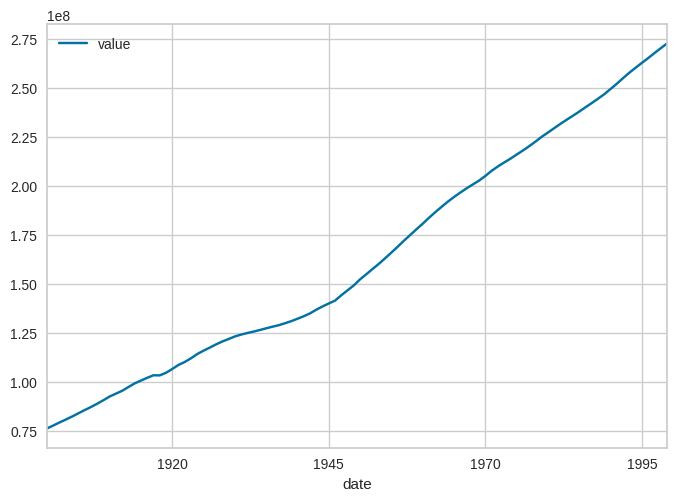

In [23]:
data.plot()

In [24]:
best = exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
auto_arima,Auto ARIMA,0.0262,0.0298,354143.5556,420456.4104,0.0014,0.0014,0.9543,1.3933
ets,ETS,0.0336,0.0354,451713.2237,498390.1746,0.0018,0.0018,0.9291,0.1067
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.0357,0.0376,479843.9549,529799.4220,0.0019,0.0019,0.9139,0.1733
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.0357,0.0376,479843.9549,529799.4220,0.0019,0.0019,0.9139,0.1633
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.0372,0.0402,500718.0259,565605.9786,0.0020,0.0020,0.8961,0.1600
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.0372,0.0402,500718.0259,565605.9786,0.0020,0.0020,0.8961,0.1667
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.0372,0.0402,500718.0259,565605.9786,0.0020,0.0020,0.8961,0.1667
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.0382,0.0409,514374.3375,576565.2353,0.0020,0.0020,0.8989,0.2167
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.0385,0.0414,517577.1910,582248.7023,0.0021,0.0021,0.8911,0.1567
exp_smooth,Exponential Smoothing,0.0603,0.0624,811635.1948,879249.6798,0.0032,0.0032,0.7269,0.0967


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [32]:
prediction = exp.predict_model(best, fh = 30)
prediction

,y_pred
1997,267653868.0
1998,270079164.0
1999,272504460.0
2000,274929756.0
2001,277355052.0
2002,279780348.0
2003,282205644.0
2004,284630940.0
2005,287056236.0
2006,289481532.0


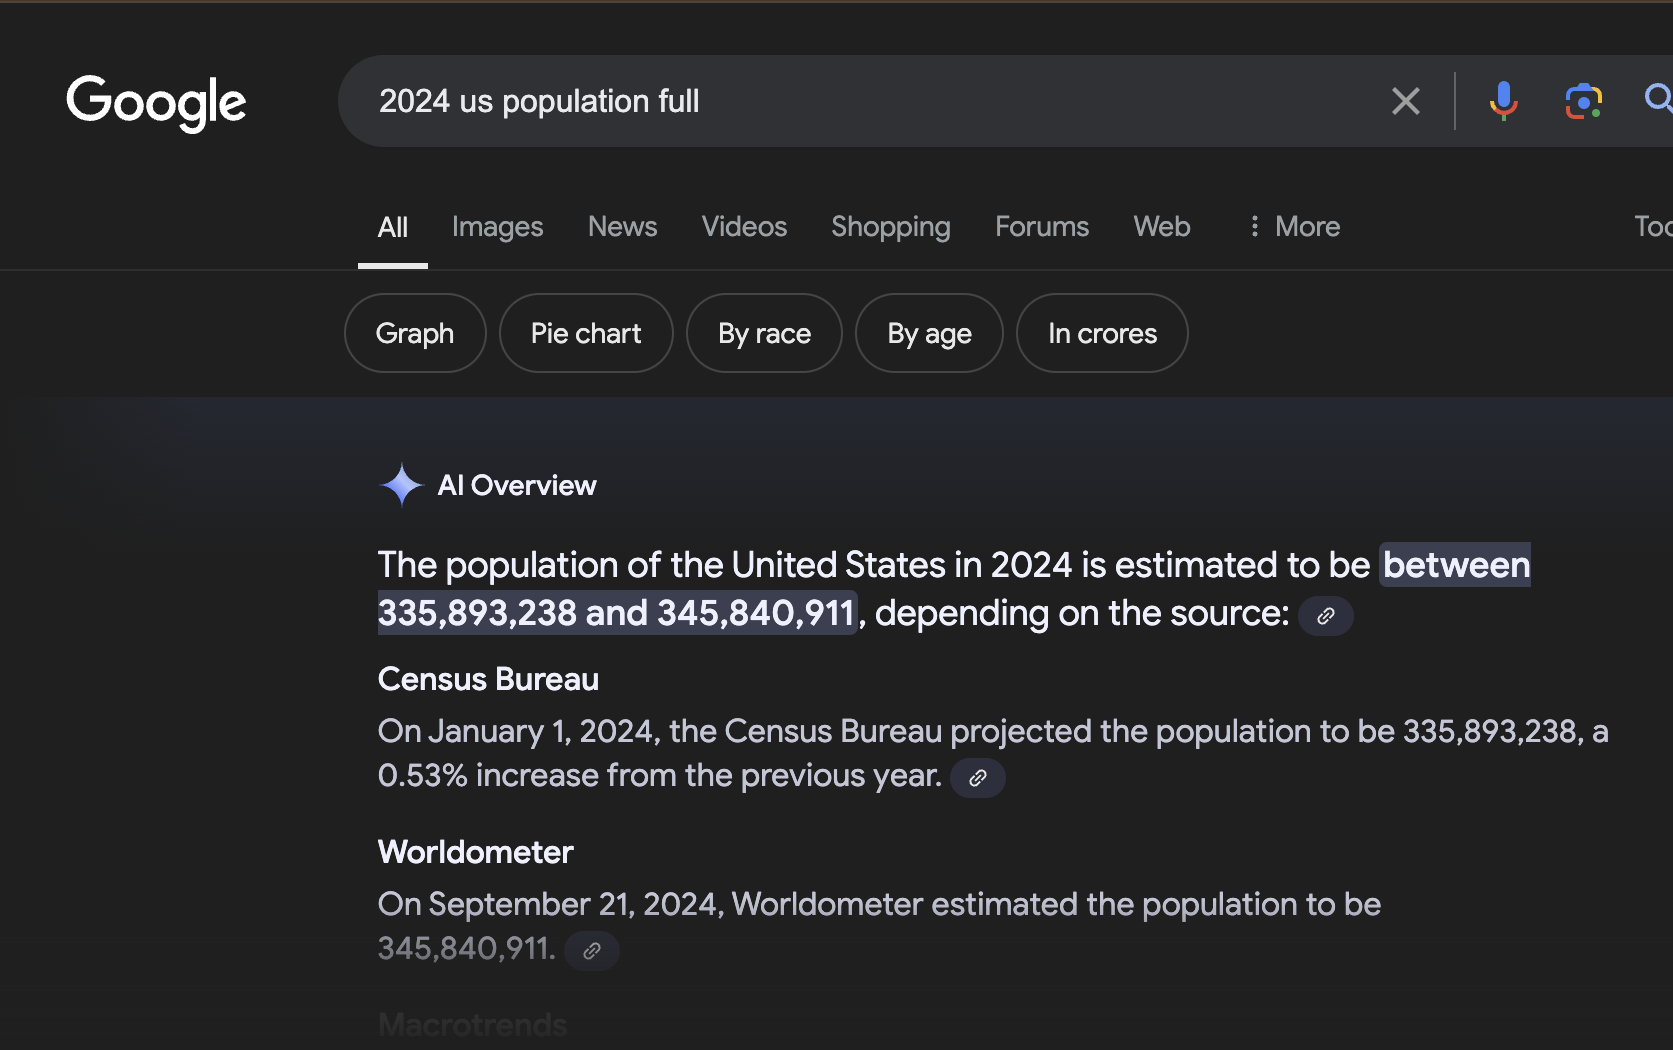